<a href="https://colab.research.google.com/github/CorkyCroc/Vinuni/blob/main/Intro%20to%20DS/Final/Final_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import file**


In [402]:
# import csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Final Draft 16.42.20.csv')
df

,title,channel_title,subscriber_count,duration_minutes,released_year,views,language,region,likes,comments,has_subtitles
0,lofi hip hop radio 📚 beats to relax/study to,Lofi Girl,14900000,0.00,2022,543390142,en-US,FR,3227137,0,False
1,Chill Lofi Beats Mix [chill lo-fi hip hop beat...,Art Is Sound,12500,102.92,2024,2459613,en-US,US,15513,424,False
2,90's Lofi City 🔥Retro Tokyo Lofi 🌃 Lo fi Beats...,Chillhop Street Beats,26800,90.82,2024,4093102,en,US,36930,1460,True
3,𝙻𝚘𝚏𝚒 𝚁𝚘𝚘𝚖 / 𝙶𝚞𝚒𝚝𝚊𝚛 𝙻𝚘𝚏𝚒 / 𝙲𝚊𝚏𝚎 𝙼𝚞𝚜𝚒𝚌 / 𝙴𝚊𝚜𝚢 𝚕𝚒...,Myour Music,39800,182.48,2024,4176732,en,US,31549,344,False
4,90's Chill Lofi ☕️ Study Music Lofi Rain Chill...,The Japanese Town,50400,713.75,2024,9689587,en,US,78930,2972,False
...,...,...,...,...,...,...,...,...,...,...,...
95,🥵Yamakaathaghi - Review⁉️ #shorts #review #dhi...,Dhiwesh Vlogs,19700,0.70,2025,130835,hindi,IN,4703,84,False
96,Sinners - Movie Review,Mike’s Movie Reviews,1730,0.75,2025,13703,en,US,301,13,True
97,Shin Chan: Our Dinosaur Diary Movie Review | Y...,YOGI BOLTA HAI,1310000,2.15,2025,245016,zxx,IN,11353,345,True
98,Raid 2 Movie REVIEW | Deeksha Sharma,Filmi Indian,4590000,5.17,2025,635937,hindi,IN,15658,1554,True


# **2. Data Processing**

### 2.1. Clean Data

In [403]:
# Duplicate values
print(f"Duplicated values: {df.duplicated().sum()}")
# Missing values
print(f"Missing values: {df.isna().sum().sum()}")

Duplicated values: 0
Missing values: 0


In [404]:
# Remove all the 0 second videos
df['duration_minutes'] = df['duration_minutes'].apply(lambda x: np.nan if x == 0 else x)
df.dropna(subset=['duration_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [405]:
# Combine all language that contain "en"
df['language'] = df['language'].apply(lambda x: 'English' if 'en' in x.lower() else x)
# Combine hindi, IN, te, tegulu, tamil, hi, ta language to Indian
unique_val = df['language'].unique()
for val in unique_val:
  if 'hindi' in val.lower() or 'IN' in val or 'te' in val.lower() or 'tegulu' in val.lower() or 'tamil' in val.lower() or 'hi' in val.lower() or 'ta' in val:
    df['language'] = df['language'].apply(lambda x: 'Indian' if x == val else x)
# Combine all other language that less than count less than 5 to 'Others'
df['language'] = df['language'].apply(lambda x: 'Others' if df['language'].value_counts()[x] < 5 else x)
df['language'].value_counts()

,count
language,
English,49
unknown,23
Indian,21
Others,5


In [406]:
en_lang = df[df['language'] == 'English']
en_lang["has_subtitles"].value_counts()

,count
has_subtitles,
True,33
False,16


In [407]:
# Convert True to 1, False to 0, and NaN to 0 for has_subtitles
df['has_subtitles'] = df['has_subtitles'].map({True: 1, False: -1}).fillna(0).astype(int)
df

,title,channel_title,subscriber_count,duration_minutes,released_year,views,language,region,likes,comments,has_subtitles
0,Chill Lofi Beats Mix [chill lo-fi hip hop beat...,Art Is Sound,12500,102.92,2024,2459613,English,US,15513,424,-1
1,90's Lofi City 🔥Retro Tokyo Lofi 🌃 Lo fi Beats...,Chillhop Street Beats,26800,90.82,2024,4093102,English,US,36930,1460,1
2,𝙻𝚘𝚏𝚒 𝚁𝚘𝚘𝚖 / 𝙶𝚞𝚒𝚝𝚊𝚛 𝙻𝚘𝚏𝚒 / 𝙲𝚊𝚏𝚎 𝙼𝚞𝚜𝚒𝚌 / 𝙴𝚊𝚜𝚢 𝚕𝚒...,Myour Music,39800,182.48,2024,4176732,English,US,31549,344,-1
3,90's Chill Lofi ☕️ Study Music Lofi Rain Chill...,The Japanese Town,50400,713.75,2024,9689587,English,US,78930,2972,-1
4,Make you feel positive and peaceful 🍀 Lofi Cof...,Lofi Coffee,66800,1478.63,2024,6785571,unknown,US,47591,1673,1
...,...,...,...,...,...,...,...,...,...,...,...
93,🥵Yamakaathaghi - Review⁉️ #shorts #review #dhi...,Dhiwesh Vlogs,19700,0.70,2025,130835,Indian,IN,4703,84,-1
94,Sinners - Movie Review,Mike’s Movie Reviews,1730,0.75,2025,13703,English,US,301,13,1
95,Shin Chan: Our Dinosaur Diary Movie Review | Y...,YOGI BOLTA HAI,1310000,2.15,2025,245016,Others,IN,11353,345,1
96,Raid 2 Movie REVIEW | Deeksha Sharma,Filmi Indian,4590000,5.17,2025,635937,Indian,IN,15658,1554,1


### 2.2. Visualize Data

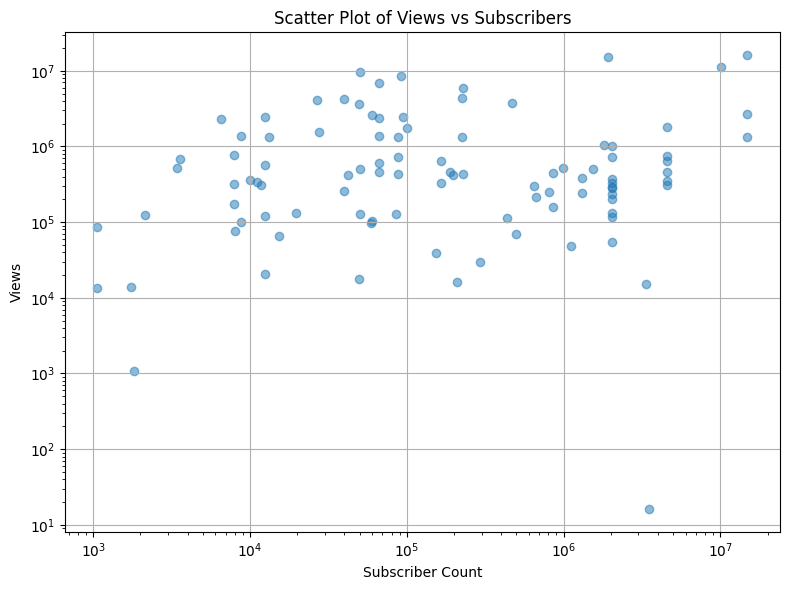

In [408]:
x_col = 'subscriber_count'
y_col = 'views'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_col], df[y_col], alpha=0.5)

# (Optional) If the distributions span many orders of magnitude:
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.grid(True)
plt.xlabel('Subscriber Count')
plt.ylabel('Views')
plt.title('Scatter Plot of Views vs Subscribers')

plt.tight_layout()
plt.show()


<ipython-input-409-80fc8ff5db32>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


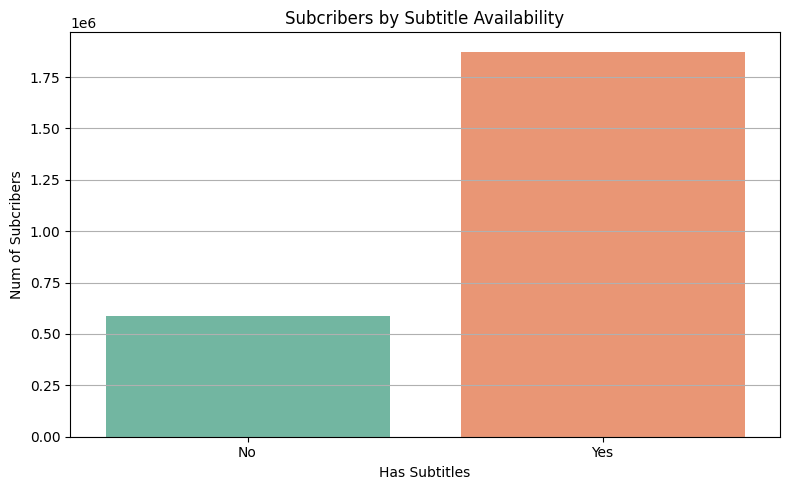

In [409]:
# Create a bar chart to compare average likes between videos with and without subtitles
plt.figure(figsize=(8, 5))
avg_likes = df.groupby('has_subtitles')['subscriber_count'].mean().reset_index()

sns.barplot(
    data=avg_likes,
    x='has_subtitles',
    y='subscriber_count',
    palette='Set2'
)

plt.title("Subcribers by Subtitle Availability")
plt.xlabel("Has Subtitles")
plt.ylabel("Num of Subcribers")
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

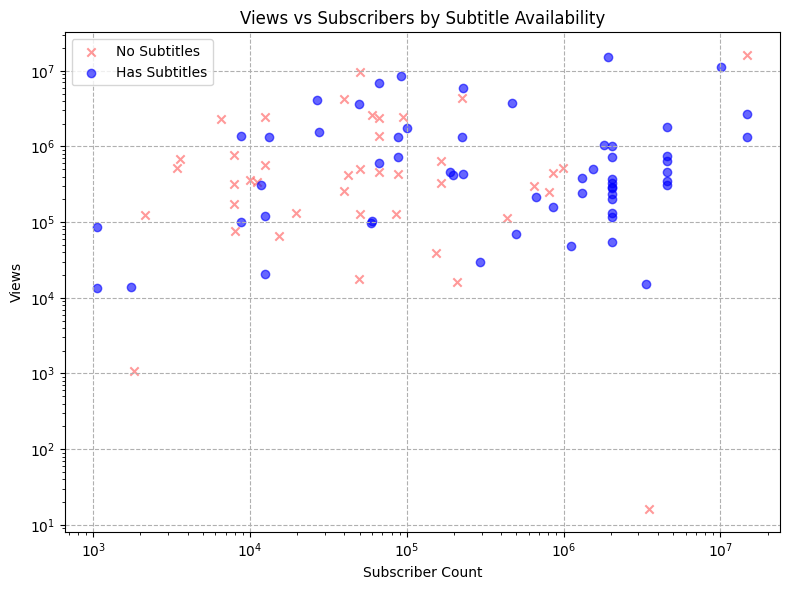

In [410]:
# Identify which column flags subtitles
subtitle_col = 'has_subtitles' if 'has_subtitles' in df.columns else 'has_subtitle'

# Split into two subsets
no_subs = df[df[subtitle_col] == -1]
with_subs = df[df[subtitle_col] == 1]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(no_subs['subscriber_count'], no_subs['views'],
            marker='x', alpha=0.4, label='No Subtitles', color = "red")
plt.scatter(with_subs['subscriber_count'], with_subs['views'],
            marker='o', alpha=0.6, label='Has Subtitles', color = 'blue')

# (Optional) Log scales if your data spans many orders:
plt.xscale('log')
plt.yscale('log')

# Labels, title, legend
plt.xlabel('Subscriber Count')
plt.ylabel('Views')
plt.title('Views vs Subscribers by Subtitle Availability')
plt.legend()
plt.grid(True, ls='--')

# Show it
plt.tight_layout()
plt.show()

# **3. Supervised Learning**

### 3.1. Data Classification

In [411]:
# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [412]:
from sklearn.model_selection import train_test_split

# 1. Split off X and y
X = df.drop(columns=['has_subtitles', 'region','title', 'channel_title', 'language'])
y = df['has_subtitles']

# 2. If your labels are ±1, convert them to {0,1}
if set(y.unique()) == {-1, 1}:
    y = ((y + 1) // 2).astype(int)

# 3. Proper train/test split with stratification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Confirm
print("Train class balance:\n", y_train_cls.value_counts(normalize=True))
print(" Test class balance:\n", y_test_cls.value_counts(normalize=True))


Train class balance:
 has_subtitles
1    0.576923
0    0.423077
Name: proportion, dtype: float64
 Test class balance:
 has_subtitles
1    0.6
0    0.4
Name: proportion, dtype: float64


### 3.2. Logistic Model


In [413]:
# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function for logistic regression (returns labels)
def predict_logistic(X, beta, beta_0):
    probs = sigmoid(beta_0 + np.dot(X, beta))
    return (probs >= 0.5).astype(int)


# Logistic Loss (Binary Cross-Entropy) using X, y, beta, and beta_0
def logistic_loss(X, y, beta, beta_0):
    y_pred = sigmoid(beta_0 + np.dot(X, beta))
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [414]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose      import ColumnTransformer
from sklearn.pipeline     import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import accuracy_score

# 1. Binarize ±1 → {0,1}
y_train_bin = ((y_train_cls + 1) // 2).astype(int)
y_test_bin  = ((y_test_cls  + 1) // 2).astype(int)

# 2. Pick features
numeric_features = X_train_cls.select_dtypes(include=[np.number]).columns.tolist()

# only keep categoricals with few distinct values
categorical_features = [
    col for col in X_train_cls.select_dtypes(include=['object','category']).columns
    if X_train_cls[col].nunique() <= 10
]

# 3. Build preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output = False), categorical_features)
], remainder='drop')

# 4. Pipeline + CV for C
pipe = Pipeline([
    ('prep', preprocessor),
    ('clf',  LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {'clf__C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_cls, y_train_bin)

best_model = grid.best_estimator_
clf  = best_model.named_steps['clf']

# 5. Extract & print coefficients
beta  = clf.coef_[0].tolist()
beta0 = clf.intercept_[0]
print(f"β:  {beta}")
print(f"β₀: {beta0:.4f}")


β:  [2.156340021923663, -0.3381536355276278, -0.7295921682041281, -1.0475712243280002, 1.3989092035951702, 0.8066127277525794]
β₀: 1.0040


In [415]:
# 6. Transform features for loss computation
X_train_t = best_model.named_steps['prep'].transform(X_train_cls)
X_test_t  = best_model.named_steps['prep'].transform(X_test_cls)

# 7. Predict & evaluate
y_train_pred = best_model.predict(X_train_cls)
y_test_pred  = best_model.predict(X_test_cls)

train_loss = logistic_loss(X_train_t, y_train_bin, beta, beta0)
test_loss  = logistic_loss(X_test_t,  y_test_bin,  beta, beta0)

train_acc = accuracy_score(y_train_bin, y_train_pred)
test_acc  = accuracy_score(y_test_bin,  y_test_pred)

print(f"Training loss: {train_loss:.4f}; Accuracy: {train_acc:.4f}")
print(f"Testing  loss: {test_loss:.4f}; Accuracy: {test_acc:.4f}")

Training loss: 0.5134; Accuracy: 0.6923
Testing  loss: 1.0417; Accuracy: 0.6000


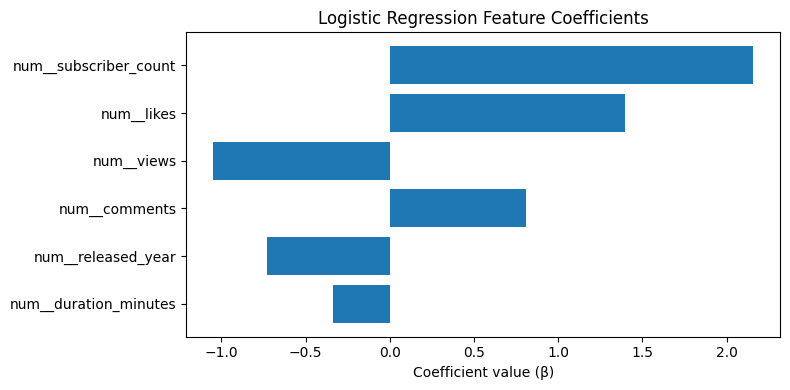

In [416]:
from sklearn.metrics import roc_curve, auc

# 1) Bar chart of feature coefficients
feat_names = best_model.named_steps['prep'].get_feature_names_out()
coefs      = best_model.named_steps['clf'].coef_[0]

# sort by absolute value
idx         = np.argsort(np.abs(coefs))[::-1]
feat_sorted = feat_names[idx]
coef_sorted = coefs[idx]

plt.figure(figsize=(8,4))
plt.barh(feat_sorted, coef_sorted)
plt.xlabel("Coefficient value (β)")
plt.title("Logistic Regression Feature Coefficients")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


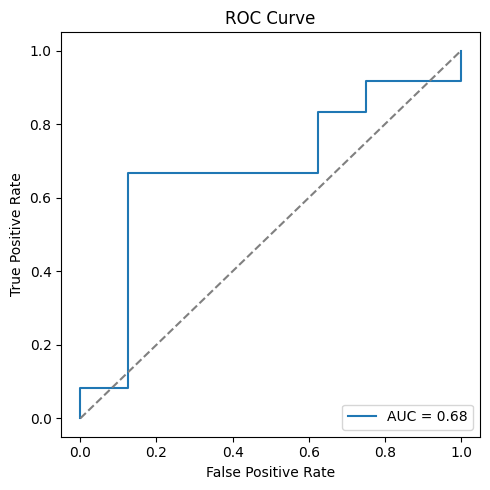

In [417]:
# 2) ROC curve
y_test_proba = best_model.predict_proba(X_test_cls)[:, 1]
fpr, tpr, _  = roc_curve(y_test_bin, y_test_proba)
roc_auc      = auc(fpr, tpr)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### 3.3. SVM

In [418]:
# Prediction function for SVM (sign function)
def predict_svm(X, beta, beta_0):
    return np.sign(beta_0 + np.dot(X, beta))

# Hinge Loss for SVM using X, y, beta, and beta_0
def hinge_loss(X, y, beta, beta_0):
    margin = y * (beta_0 + np.dot(X, beta))
    return np.mean(np.maximum(0, 1 - margin))

In [419]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# 1. Map your {0,1} classes → {–1,+1}
y_train_svm = np.where(y_train_cls == 1,  1, -1)
y_test_svm  = np.where(y_test_cls  == 1,  1, -1)

# 2. Select & scale numeric features only
X_train_num = X_train_cls.select_dtypes(include=[np.number])
X_test_num  = X_test_cls.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled  = scaler.transform(X_test_num)

# 3. Fit your Linear SVM
svm_model = LinearSVC(max_iter=10000, random_state=42)
svm_model.fit(X_train_scaled, y_train_svm)

# 4. Extract parameters
beta   = svm_model.coef_[0]
beta_0 = svm_model.intercept_[0]
print("beta:", beta)
print("beta_0:", beta_0)


beta: [ 0.80118795 -0.14656188 -0.29613175 -0.39722496  0.48418621  0.31780829]
beta_0: 0.3501741876108058


In [420]:
# 5. Compute hinge‐loss & accuracy
train_loss = hinge_loss(X_train_scaled, y_train_svm, beta, beta_0)
test_loss  = hinge_loss(X_test_scaled,  y_test_svm,  beta, beta_0)

train_pred = predict_svm(X_train_scaled, beta, beta_0)
test_pred  = predict_svm(X_test_scaled,  beta, beta_0)

train_acc = accuracy_score(y_train_svm, train_pred)
test_acc  = accuracy_score(y_test_svm,  test_pred)

# 6. Report in your original style
print(f"Training loss: {train_loss:.4f}, accuracy: {train_acc:.4f}")
print(f"Testing  loss: {test_loss:.4f}, accuracy: {test_acc:.4f}")

Training loss: 0.7152, accuracy: 0.6923
Testing  loss: 0.9794, accuracy: 0.6000


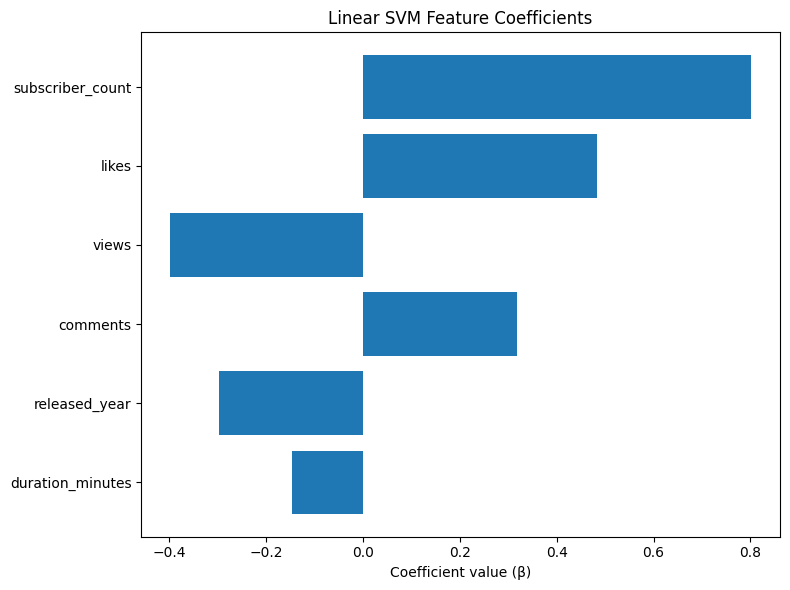

In [421]:
from sklearn.metrics import roc_curve, auc

# 1) Extract & scale numeric features
X_train_num    = X_train_cls.select_dtypes(include=[np.number])
X_test_num     = X_test_cls.select_dtypes(include=[np.number])
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled  = scaler.transform(X_test_num)

# 2) Prepare labels for ROC (map {0,1} → {–1,+1})
y_test_svm = np.where(y_test_cls == 1,  1, -1)

# 3) Bar chart of SVM coefficients
feat_names = X_train_num.columns.tolist()
coefs      = svm_model.coef_[0]
order      = np.argsort(np.abs(coefs))[::-1]
plt.figure(figsize=(8, 6))
plt.barh(
    [feat_names[i] for i in order],
    coefs[order]
)
plt.xlabel("Coefficient value (β)")
plt.title("Linear SVM Feature Coefficients")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


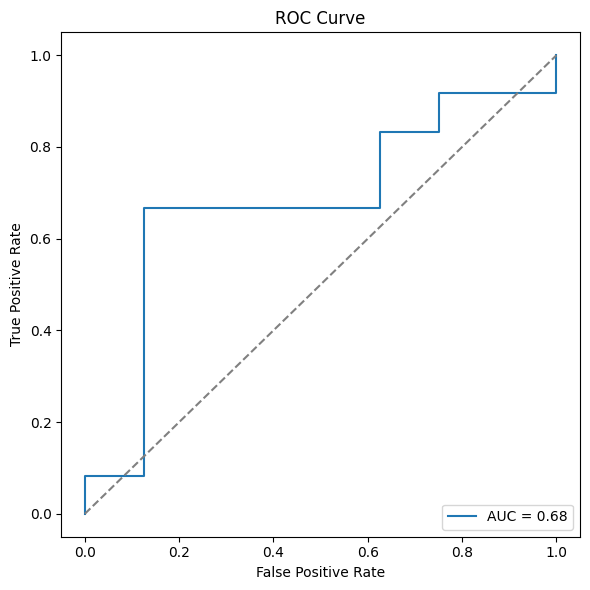

In [422]:
# 4) ROC curve using decision_function
scores      = svm_model.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test_svm, scores)
roc_auc     = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# **4. Unsupervised Learning**


### 4.1. K-Means Clustering

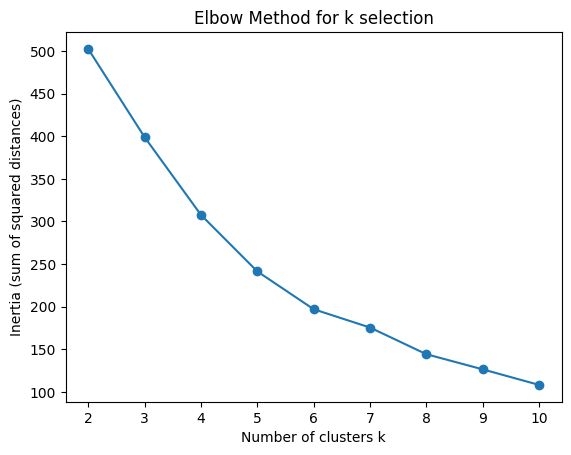

In [423]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster     import KMeans
from sklearn.metrics     import silhouette_score
from sklearn.decomposition import PCA

# 1. Select the features you want to cluster on (numeric only)
X_cluster = df.select_dtypes(include=[np.number]).copy()

# 2. Scale them
scaler    = StandardScaler()
X_scaled  = scaler.fit_transform(X_cluster)

# 3. Use the Elbow Method to pick a candidate k
inertia = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for k selection')
plt.show()

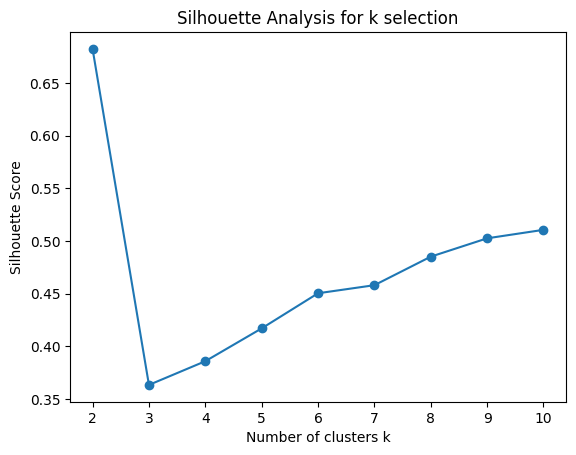

In [424]:
# 4. Use Silhouette Scores to refine your choice
sil_scores = []
for k in k_range:
    km     = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(k_range, sil_scores, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for k selection')
plt.show()

         subscriber_count  duration_minutes  released_year         views  \
cluster                                                                    
0            1.981275e+05        542.896000    2023.300000  2.762458e+06   
1            2.176521e+06         33.124286    2024.880952  6.434500e+05   
2            8.970000e+06         64.326667    2023.333333  1.427978e+07   
3            2.599588e+05         98.667273    2024.636364  5.639003e+05   

                 likes     comments  has_subtitles  
cluster                                             
0         31878.200000   825.150000       0.300000  
1         24809.857143   878.333333       1.000000  
2        540436.333333  5927.000000       0.333333  
3          7836.696970   181.787879      -1.000000  


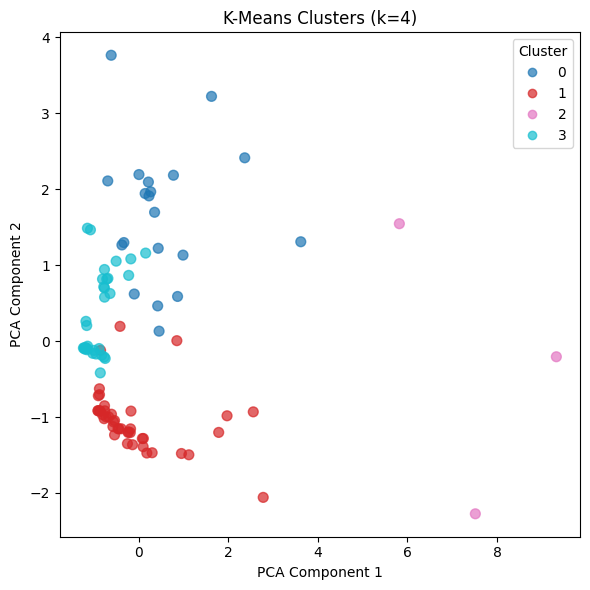

In [425]:
# 5. Fit final model with your chosen k (e.g. k=4)
k_opt   = 4
kmeans  = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels  = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_

# 6. Attach cluster labels back to your DataFrame
df['cluster'] = labels

# 7. Profile each cluster (mean feature values)
cluster_profile = df.groupby('cluster')[X_cluster.columns].mean()
print(cluster_profile)

# 8. (Optional) 2-D visualization via PCA
pca   = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=labels, cmap='tab10', s=50, alpha=0.7
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clusters (k={k_opt})')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

In [426]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1. Inertia (“loss”)
inertia = kmeans.inertia_
print(f"Inertia (within-cluster sum of squares): {inertia:.4f}")

# 2. Silhouette Score (“accuracy-like”)
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# 3. Davies–Bouldin Index (lower is better)
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies–Bouldin Index: {db_index:.4f}")


Inertia (within-cluster sum of squares): 307.7417
Silhouette Score: 0.3859
Davies–Bouldin Index: 1.0642


# **5. Models Comparison**

In [427]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# 1) LOGISTIC REGRESSION METRICS
y_pred_log   = best_model.predict(X_test_cls)
y_proba_log  = best_model.predict_proba(X_test_cls)[:, 1]
log_acc      = accuracy_score(y_test_bin, y_pred_log)
fpr_log, tpr_log, _ = roc_curve(y_test_bin, y_proba_log)
auc_log      = auc(fpr_log, tpr_log)

# 2) SVM METRICS
# (we assume you already scaled numeric features into X_test_scaled and have y_test_svm in {+1,-1})
y_scores_svm = svm_model.decision_function(X_test_scaled)
fpr_svm, tpr_svm, _  = roc_curve(y_test_svm, y_scores_svm)
auc_svm      = auc(fpr_svm, tpr_svm)
y_pred_svm   = np.sign(y_scores_svm)
svm_acc      = accuracy_score(y_test_svm, y_pred_svm)

# 3) K-MEANS PURITY
# Map each cluster to its majority true label (0/1)
mapping = {}
for cl in np.unique(kmeans.labels_):
    mask = (kmeans.labels_ == cl)
    true = y.values[mask]
    mapping[cl] = np.bincount(true).argmax()

y_pred_km = np.array([mapping[c] for c in kmeans.labels_])
purity    = accuracy_score(y, y_pred_km)

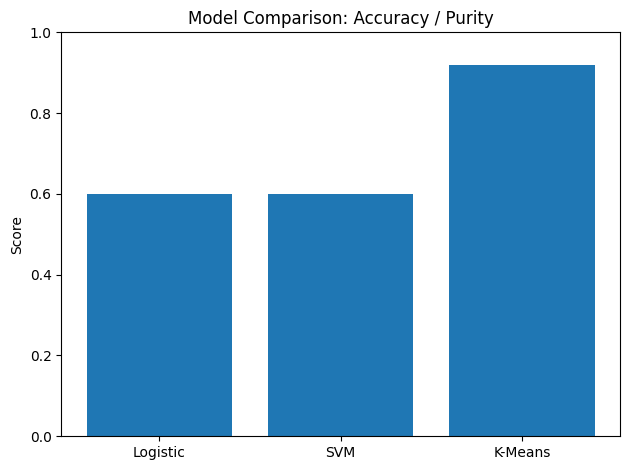

In [428]:
# 4) BAR CHART: Accuracy / Purity Comparison
models = ['Logistic', 'SVM', 'K-Means']
scores = [log_acc, svm_acc, purity]

plt.figure()
plt.bar(models, scores)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy / Purity')
plt.tight_layout()
plt.show()


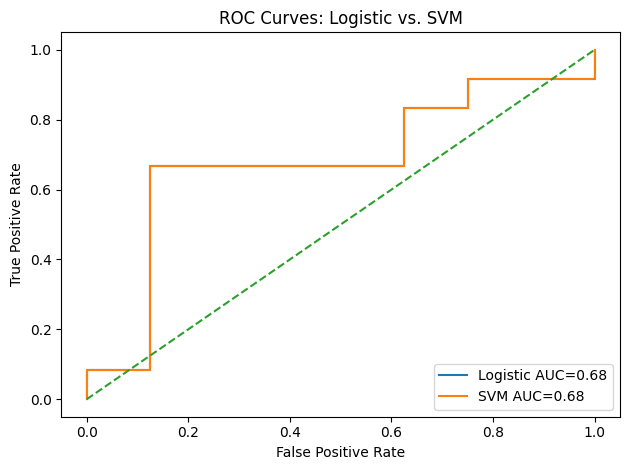

In [429]:
# 5) ROC CURVES FOR LOGISTIC & SVM
plt.figure()
plt.plot(fpr_log, tpr_log, label=f'Logistic AUC={auc_log:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC={auc_svm:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Logistic vs. SVM')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()